# Image Segmentation with Skimage

---


### Import all necessary libraries and Load Environment Variables

---

- Numpy: used here for checking if the colour values are 8-bit unsigned integers
- Skimage Segmentation: used for image segmentation using Simple Linear Iterative Clustering (SLIC)
- Skimage Color: used for coverting the segmentation labels into rgb colours `color.label2rgb`
- Matplotlib: used for visualising the segments


In [1]:
import numpy as np
from skimage import segmentation, color
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

image_directory = os.getenv('IMAGE_DIR')

In [2]:
def segment_and_view_image(image_path, n_segments=100, compactness=10, sigma=2):
    """
    Segment an image using SLIC superpixels and display both original and segmented images.
    
    Args:
        image_path (str): Path to the input image
        n_segments (int): Number of segments to create (default: 100)
    """
    # Read the image
    img = plt.imread(image_path)
    
    # Convert to float if needed
    if img.dtype == np.uint8:
        img = img.astype('float') / 255

    # Apply SLIC segmentation
    segments = segmentation.slic(img, n_segments=n_segments, compactness=compactness, sigma=sigma)
    
    # Create segmented image
    segmented_img = color.label2rgb(segments, img, kind='avg')
    
    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(img)
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    ax2.imshow(segmented_img)
    ax2.set_title(f'Segmented Image ({n_segments} segments. Compactness: {compactness}, Sigma: {sigma})')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

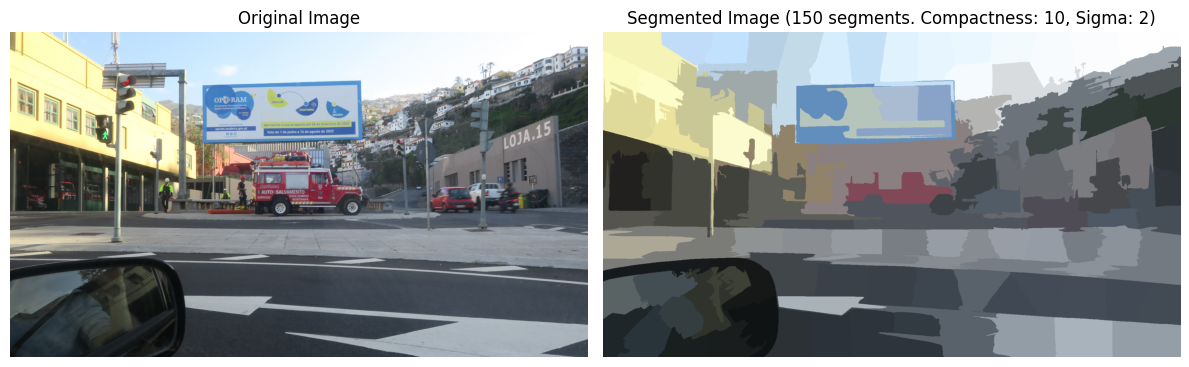

In [3]:

if __name__ == "__main__":
    image_name = "madrid_street.jpg"
    image_path = f"{image_directory}/{image_name}"
    
    # Error checking for image path and loading
    if not os.path.exists(image_path):
        print(f"Error: Image not found at {image_path}")
        exit(1)
        
    try:
        segment_and_view_image(image_path, n_segments=150, compactness=10, sigma=2)
    except Exception as e:
        print(f"Error processing image: {str(e)}")